## Лабораторная работа 2. Имитация непрерывных случайных величин. Имитация дискретных случайных величин с заданным законом распределения
Написать программу реализующую метод формирования непрерывной случайной величины. Выполнить статистическое исследование (построение гистограммы, точечных, интервальных оценок). Проверить гипотезы о соответствии закона распределения полученной случайной величины требуемому.

Написать программу, реализующую метод формирования дискретной случайной величины. Выполнить статистическое исследование (построение гистограммы, точечных, интервальных оценок). Проверить гипотезы о соответствии закона распределения полученной случайной величины требуемому.

$----------------------------------------------$

### Задание 1. Имитация непрерывных случайных величин

In [74]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci_stat
import random

In [75]:
choice = str(input("Желаете использовать подготовленые данные (y/n): "))
attmp_num = 10 ** 6
left_border = 0
right_border = 70

match choice:
    case "y":
        print("Использую подготовленные данные")
    case "n":
        left_border = float(input("Задание 1. Введите левую границу:"))
        right_border = float(input("Задание 1. Введите правую границу:"))
    case _:
        print("Начните сначала")

Построим теоретическое распределение

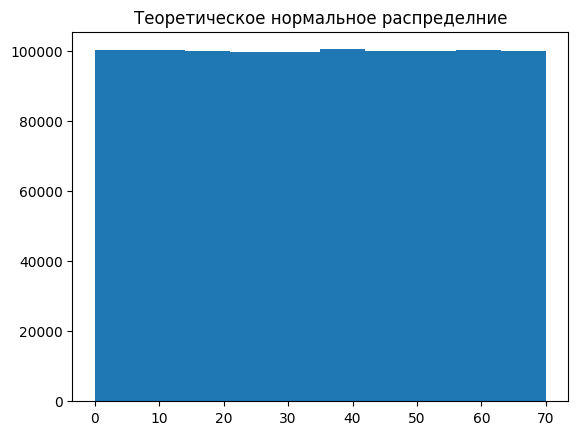

In [76]:
theor = np.random.uniform(left_border, right_border, attmp_num)
plt.hist(theor)
plt.title("Теоретическое нормальное распределние")
plt.show()

Построим распределение методом обратных функций для функции 
#### $ r = \frac{x + b}{a + b} $
Обратной функцией в таком случае будет:
#### $ x = r(a + b) - b $

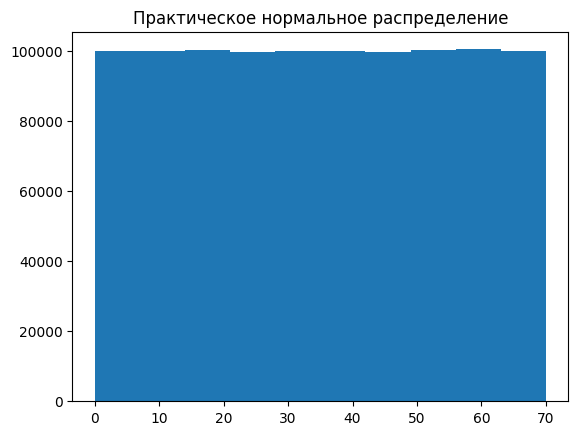

In [77]:
dots = []

for i in range(1, attmp_num):
    r = random.random()
    dot = r * (right_border + left_border) - left_border
    dots.append(dot)

plt.hist(dots)
plt.title("Практическое нормальное распределение")
plt.show()

#### Исследование

Теоретическое мат. ожидание

In [78]:
theor_m = (left_border + right_border) / 2
theor_m

35.0

Точечное мат. ожидание

In [79]:
acc_m = sum(dots) / attmp_num
acc_m

35.01380963827347

Теоретическая дисперсия

In [80]:
theor_d = (right_border - left_border) * (right_border - left_border) / 12
theor_d

408.3333333333333

Точечная дисперсия

In [81]:
acc_d = (sum([x * x for x in dots]) / attmp_num) - ((sum(dots) / attmp_num) ** 2)
acc_d

408.5838836546038

Теоретическое средневадратическое отклонение 

In [82]:
theor_sd = (right_border - left_border) / (2 * math.sqrt(3))
theor_sd

20.207259421636902

Точечное средневадратическое отклонение

In [83]:
acc_sd = math.sqrt((sum([x * x for x in dots]) / attmp_num) - ((sum(dots) / attmp_num) ** 2))
acc_sd

20.213457983596072

#### Найдем точечные границы и доверительный интервал

Найдем точечные границы

In [84]:
acc_l = acc_m - math.sqrt(3) * acc_sd
acc_r = acc_m + math.sqrt(3) * acc_sd
print(f"l = {acc_l}\nr = {acc_r}")

l = 0.0030734140263248833
r = 70.02454586252063


Построим доверительный интервал (степень доверия: 0.95, по ф-и Лаласса: 1.96)

In [85]:
gen_avg = sum(dots) / attmp_num
sub_range = (1.96 * acc_sd) / math.sqrt(attmp_num)
print(gen_avg - sub_range, gen_avg + sub_range)

34.974191260625624 35.05342801592132


#### Проверка по критерию хи-квадрат

Используемая формула критерия хи-квадрат:

##### $\chi = \sum{\frac{(O_{i} - E_{i})^{2}}{E_{i}}}$

In [86]:
chi = []
dots.sort()
theor.sort()
for i, val in enumerate(dots):
    chi.append(((val - theor[i]) ** 2) / theor[i])

acc = sum(chi)
print(acc)

48.28613711861836


Если полученный критерий хи-квадрат будет меньше контрольного, то статистическая проверка гипотезы пройдена

In [87]:
print(acc < sci_stat.chi2.ppf(0.95, attmp_num - 3))

True


### Задание 2. Имитация дискретных случайных величин с заданным законом распределения (отрицательное биномиальное распределение)

In [88]:
r = 5
p = 0.3
size = 10 ** 6

match choice:
    case "y":
        print("Использую подготовленные данные")
    case "n":
        r = float(input("Задание 2. Введите требуемое кол-во успехов:"))
        p = float(input("Задание 2. Вероятность успеха:"))
    case _:
        print("Начните сначала")

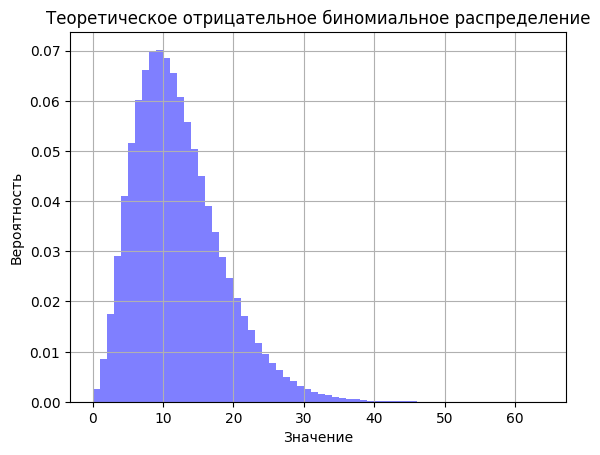

In [89]:
def negative_binomial(r, p, size=1):
    if r <= 0 or p <= 0 or p > 1:
        raise ValueError("Параметры r и p должны удовлетворять условиям: r > 0 и 0 < p <= 1")
    samples = np.random.negative_binomial(r, p, size)
    return samples

samples_numpy = negative_binomial(r, p, size)

plt.hist(samples_numpy, bins=range(min(samples_numpy), max(samples_numpy) + 2), density=True, alpha=0.5, color='b')
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.title("Теоретическое отрицательное биномиальное распределение")
plt.grid(True)
plt.show()

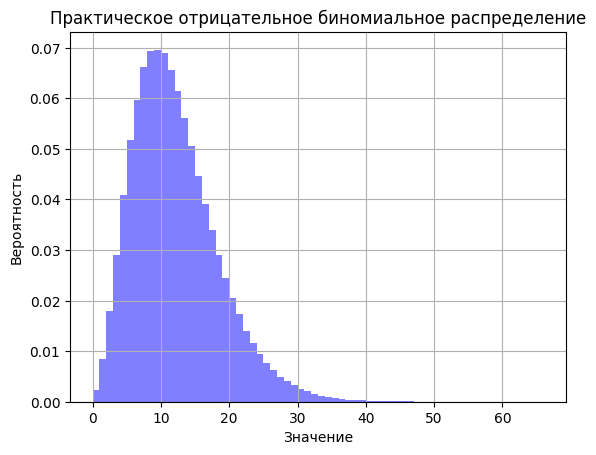

In [90]:
def my_negative_binomial(r, p, size=1):
    if r <= 0 or p <= 0 or p > 1:
        raise ValueError("Параметры r и p должны удовлетворять условиям: r > 0 и 0 < p <= 1")

    samples = []
    for _ in range(size):
        successes = 0
        failures = 0
        while successes < r:
            if np.random.rand() < p:
                successes += 1
            else:
                failures += 1
        samples.append(failures)
    
    return np.array(samples)

samples_my = my_negative_binomial(r, p, size)

plt.hist(samples_my, bins=range(min(samples_my), max(samples_my) + 2), density=True, alpha=0.5, color='b')
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.title("Практическое отрицательное биномиальное распределение")
plt.grid(True)
plt.show()

#### Исследования
Найдем мат. ожидание практического и теоретического распределений

In [91]:
np.mean(samples_numpy)

11.667553

In [92]:
np.mean(samples_my)

11.66204

Найдем дисперсию теоретического и практического распределений

In [93]:
np.var(samples_numpy)

38.914873992190984

In [94]:
np.var(samples_my)

38.74556703840002

Найдем стандартное отклонение теоретического и практического распределений

In [95]:
np.std(samples_numpy)

6.23817874000024

In [96]:
np.std(samples_my)

6.224593724766302